https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset  

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.  

The dataset consists of 10 numerical and 8 categorical attributes.  

The values of below features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.  
* `Administrative`: the number of administrative pages visited by the visitor in that session.  
* `Administrative Duration`: total time spent in administrative pages in that session.
* `Informational`: the number of informational pages visited by the visitor in that session. 
* `Informational Duration`: total time spent in informational pages in that session.
* `Product Related`: the number of product related pages visited by the visitor in that session. 
* `Product Related Duration`: total time spent in product related pages in that session.  

The below features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.  
* `Bounce Rate`: the percentage of visitors who enter the site from that web page and then leave ("bounce") without triggering any other requests to the analytics server during that session.  
* `Exit Rate`: is calculated as for all pageviews to the page, the percentage that were the last in the session.  
* `Page Value`: represents the average value for a web page that a user visited before completing an e-commerce transaction. 

* `Special Day`: indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes:  
* `operating system`  
* `browser`  
* `region`  
* `traffic type`  
* `visitor type`: returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
* `Revenue`: can be used as the class label for classification problem.

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set_palette('Set2')
sns.set_style('whitegrid')

In [219]:
data = pd.read_csv('https://raw.githubusercontent.com/JielingChen/online_shopper_intention_prediction/main/online_shoppers_intention.csv')

In [220]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

* The dataset does not contain any missing values.

In [222]:
# change the Revenue column name to Purchase
data.rename(columns={'Revenue':'Purchase'}, inplace=True)

# change the Purchase column values to 0 and 1
data['Purchase'] = data['Purchase'].map({False:0, True:1})

# calculate the purchase rate
purchase_rate = data['Purchase'].mean().round(4) * 100
print(f'The purchase rate is: {purchase_rate}%')

The purchase rate is: 15.47%


In [223]:
# convert categorical features data type into category
cat_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
for col in cat_features:
    data[col] = data[col].astype('category')

In [224]:
# check the summary statistics of numerical variables
num = data.select_dtypes(exclude=['category'])
num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000


In [225]:
# check the summary statistics of categorical variables
cat = data.select_dtypes(include=['category'])
cat.describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2
top,May,2,2,1,2,Returning_Visitor,False
freq,3364,6601,7961,4780,3913,10551,9462


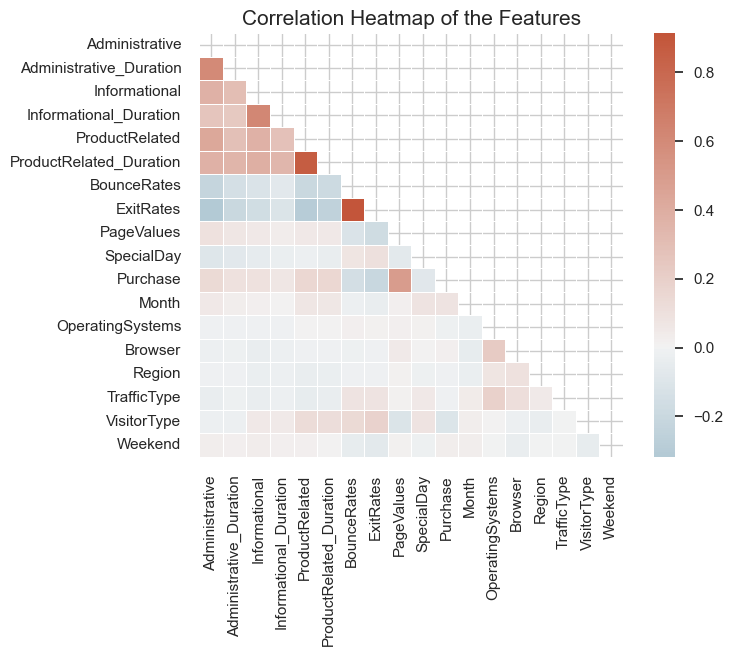

In [226]:
# encode categorical variables to integers and calculate the correlation between all the features
cat_encoded = cat.apply(lambda x: x.astype('category').cat.codes)
corr = pd.concat([num, cat_encoded], axis=1).corr()

# create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5)

plt.title('Correlation Heatmap of the Features', fontsize=15)
plt.show()

In [227]:
# print the highly correlated variables
high_corr = corr[(abs(corr) >= 0.8) & (corr != 1)]
high_corr = high_corr.stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.drop_duplicates(subset=[0])
high_corr = high_corr.rename(columns={'level_0': 'var1', 
                                      'level_1': 'var2', 
                                      0: 'corr'}).reset_index(drop=True)
high_corr

,var1,var2,corr
0,ProductRelated,ProductRelated_Duration,0.860927
1,BounceRates,ExitRates,0.913004


In [228]:
# print the moderately correlated variables
moderate_corr = corr[(abs(corr) >= 0.6) & (abs(corr) < 0.8)]
moderate_corr = moderate_corr.stack().reset_index()
moderate_corr = moderate_corr[moderate_corr['level_0'] != moderate_corr['level_1']]
moderate_corr = moderate_corr.drop_duplicates(subset=[0])
moderate_corr = moderate_corr.rename(columns={'level_0': 'var1', 
                                              'level_1': 'var2', 
                                              0: 'corr'}).reset_index(drop=True)
moderate_corr

,var1,var2,corr
0,Administrative,Administrative_Duration,0.601583
1,Informational,Informational_Duration,0.618955


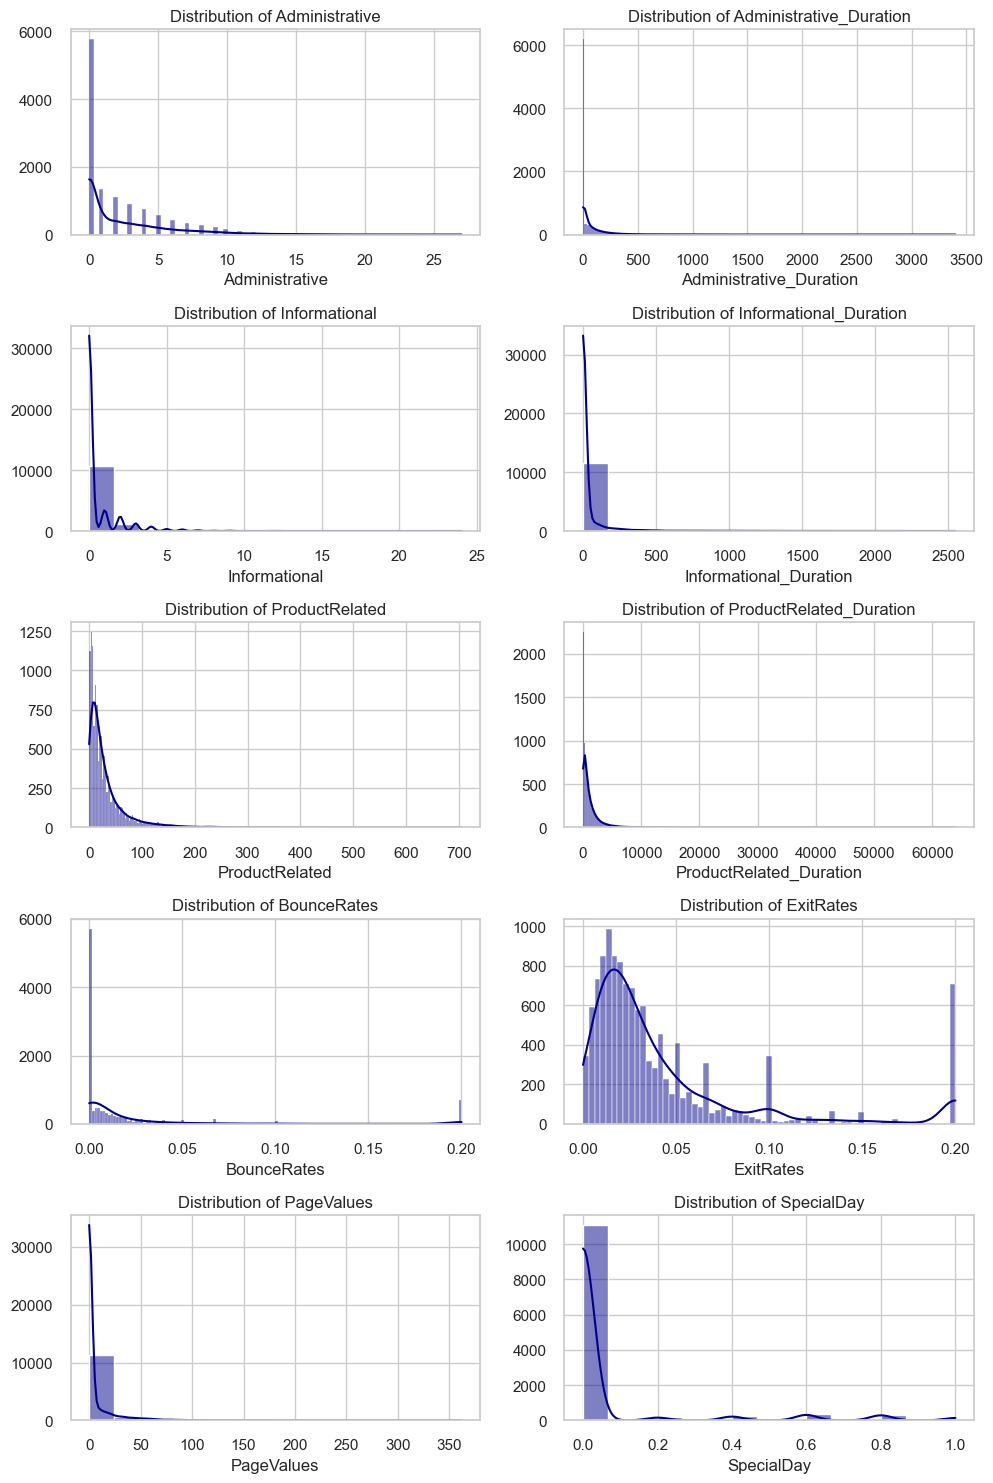

In [229]:
# plot the distribution of numerical variables
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
num_cols = num.columns
for i, ax in enumerate(axes.flatten()):
    sns.histplot(num[num_cols[i]], ax=ax, kde=True, color='darkblue')
    ax.set_title(f'Distribution of {num_cols[i]}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

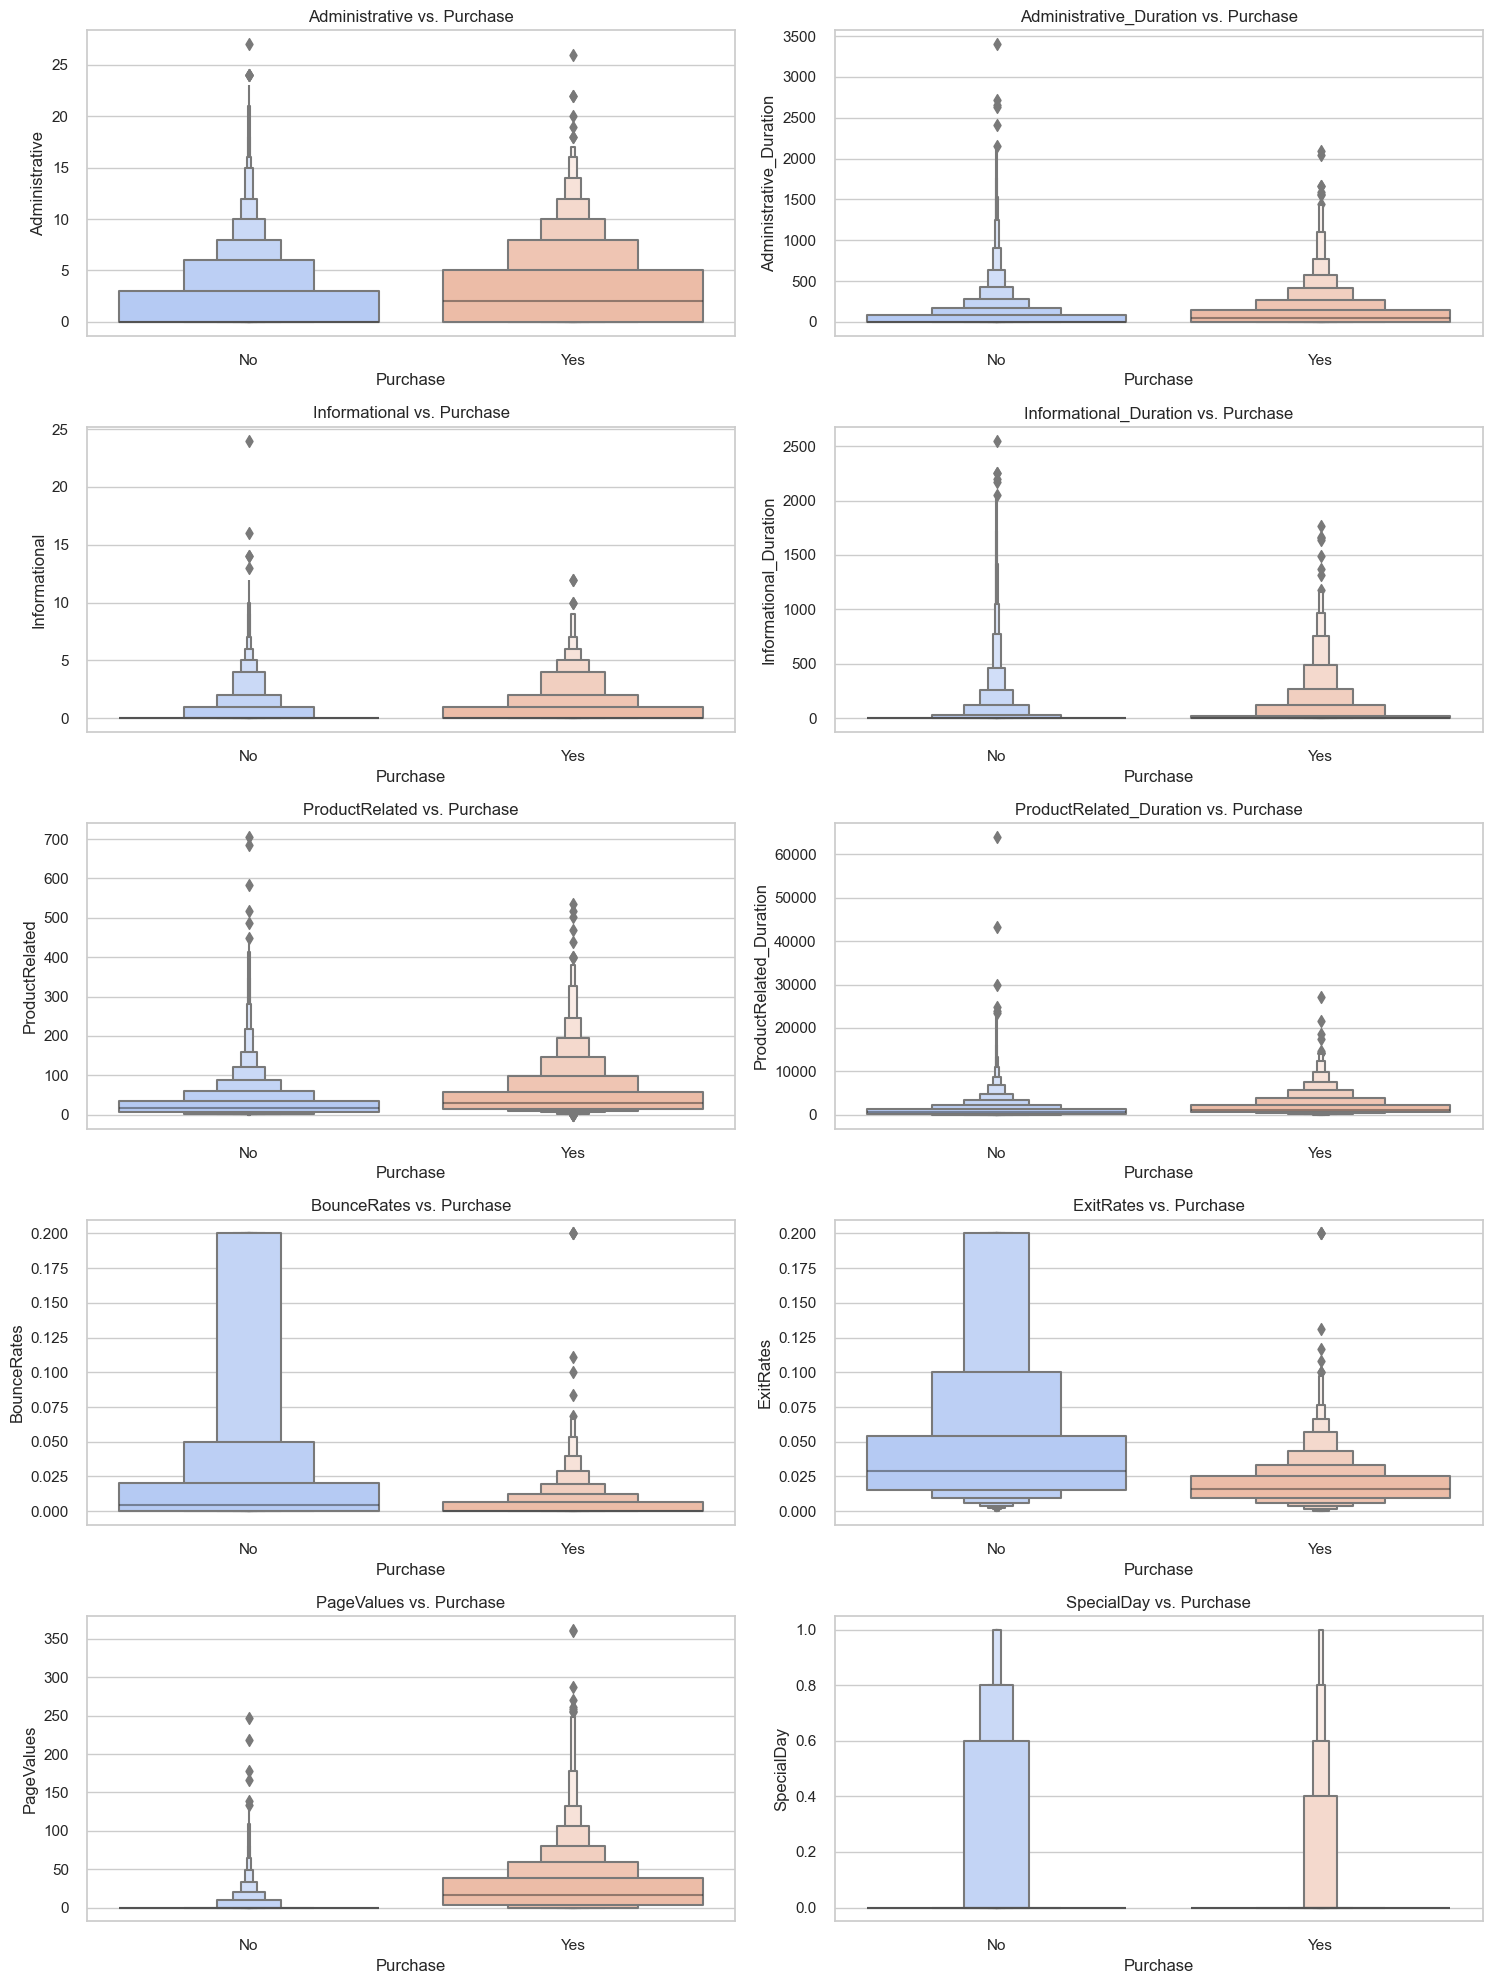

In [230]:
# plot the boxenplot of numerical variables vs. y
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
for i, ax in enumerate(axes.flatten()):
    sns.boxenplot(x='Purchase', y=num_cols[i], data=data, ax=ax, palette='coolwarm')
    ax.set_title(f'{num_cols[i]} vs. Purchase')
    ax.set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [231]:
# define a function to plot the countplot and pointplot of the purchase rate by a categorical variable
def plot_count_point(col):
    """
    Plot the countplot and pointplot of the subscription by a categorical variable.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    order = list(data[col].value_counts().sort_values(ascending=False).index)
    sns.countplot(x=col, data=data, width=0.5, order=order, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel('')
    axes[0].set_xticklabels(labels=order, rotation=45)

    sns.pointplot(x=col, y='Purchase', data=data, ci=None, order=order, ax=axes[1])
    axes[1].set_title(f'The Average Purchase Rate by {col}')
    axes[1].set_xlabel('')
    axes[1].set_xticklabels(labels=order, rotation=45)

    # add the aggregated value to the pointplot as annotation
    mean = data.groupby(col)['Purchase'].mean().reindex(order)
    for i, mean in enumerate(mean):
        axes[1].annotate(f'{mean:.3f}', xy=(i, mean), xytext=(0, 5),
                    textcoords='offset points', ha='center',
                    color='black', size=8, weight='bold')

    plt.tight_layout()
    plt.show()

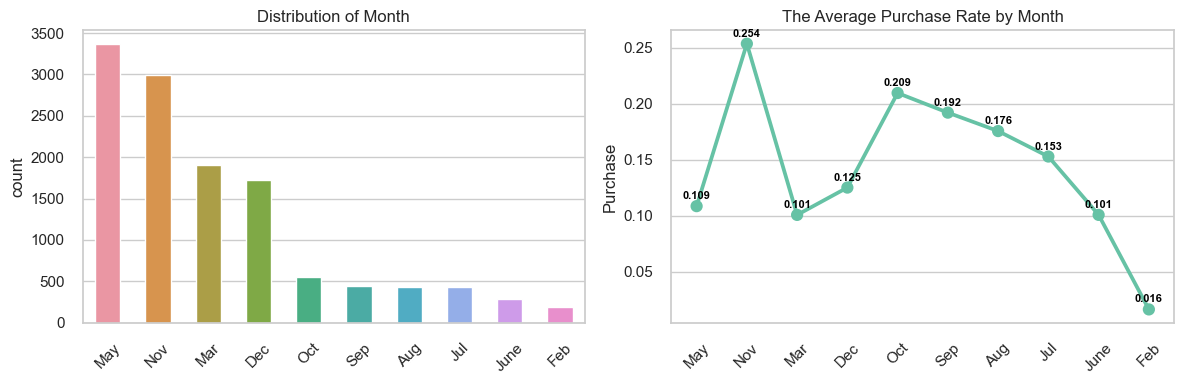

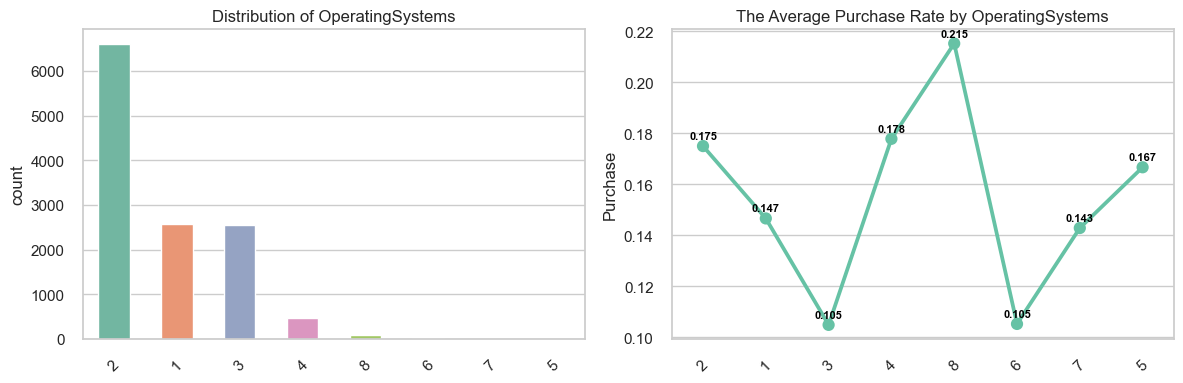

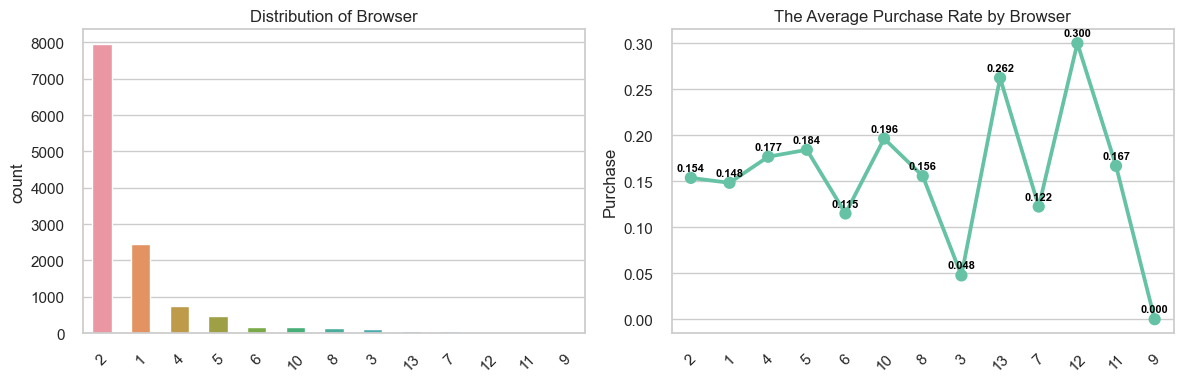

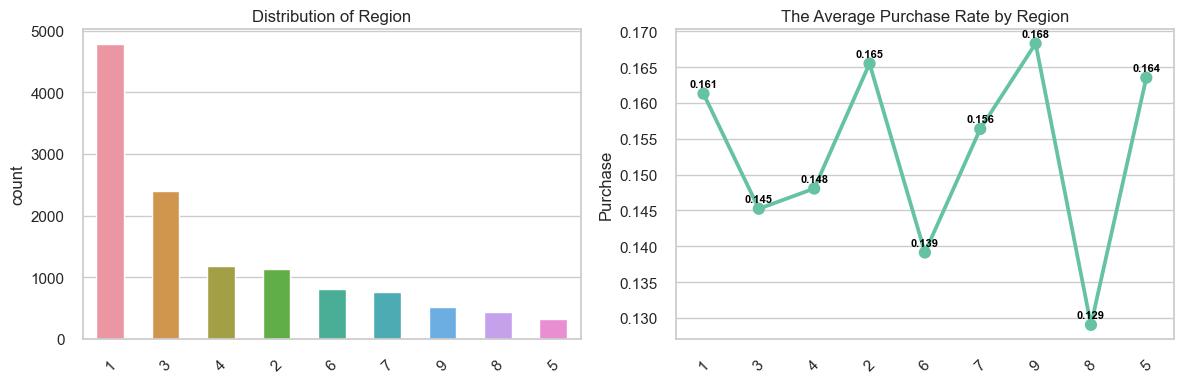

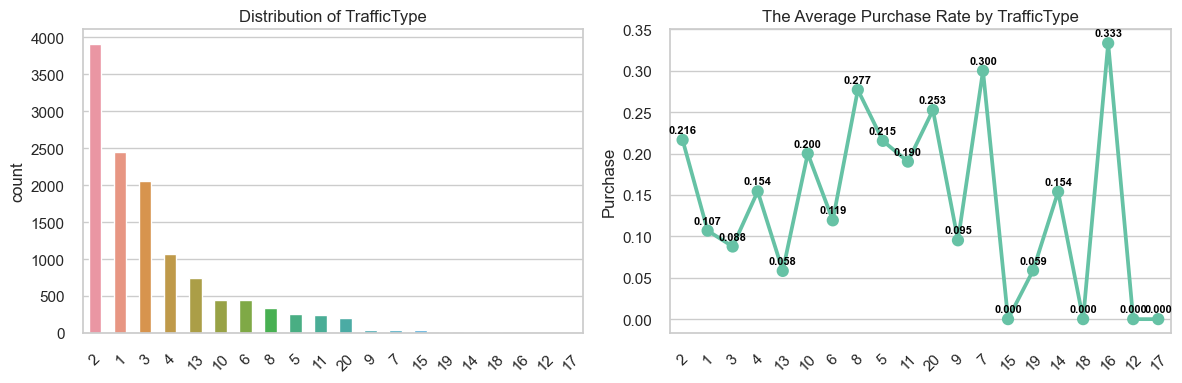

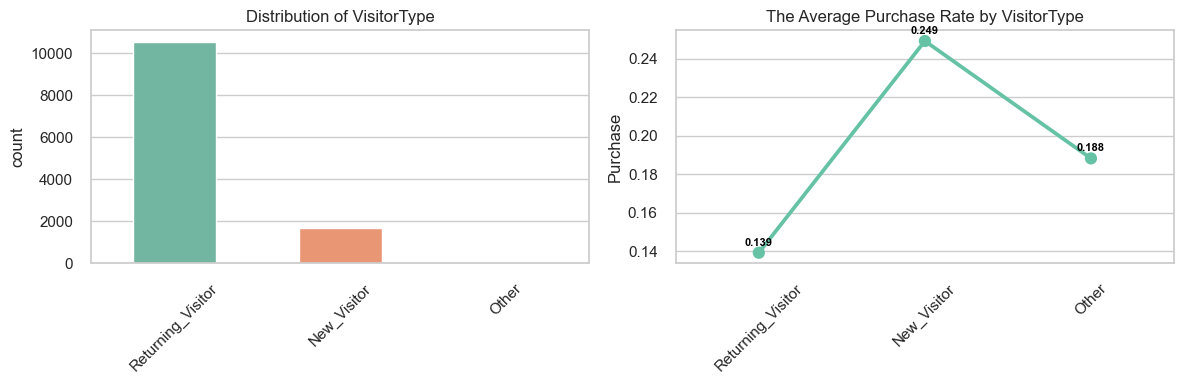

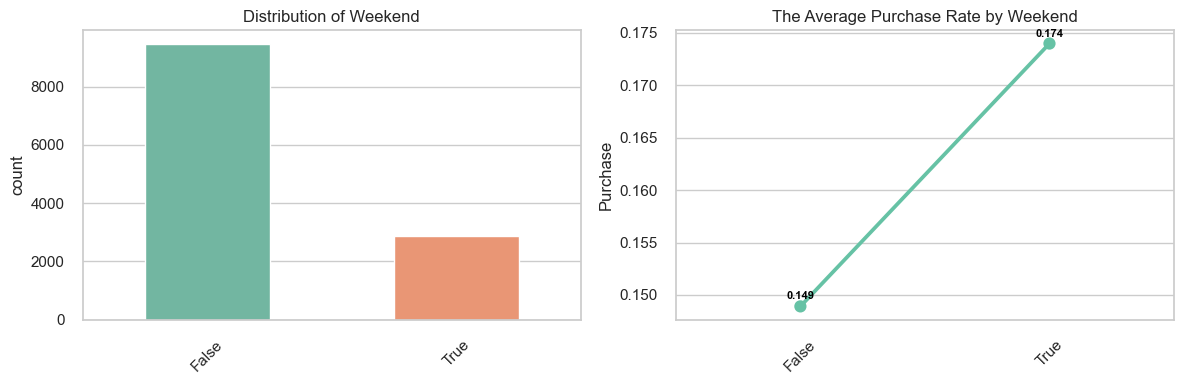

In [232]:
# plot the countplot and pointplot of the subscription by categorical variables
cat_cols = cat.columns
for col in cat_cols:
    plot_count_point(col)

Preprocessing Data for Machine Learning

In [233]:
# drop highly correlated features
data.drop(columns=['ProductRelated','BounceRates'], inplace=True)

In [234]:
# find numeric columns
num_cols = data.select_dtypes(exclude='category').columns
num_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'ExitRates',
       'PageValues', 'SpecialDay', 'Purchase'],
      dtype='object')

In [235]:
# drop the target variable
num_cols = num_cols.drop('Purchase')

In [236]:
# perform log transformation on skewed numeric features
for col in num_cols:
    data[col] = np.log1p(data[col])

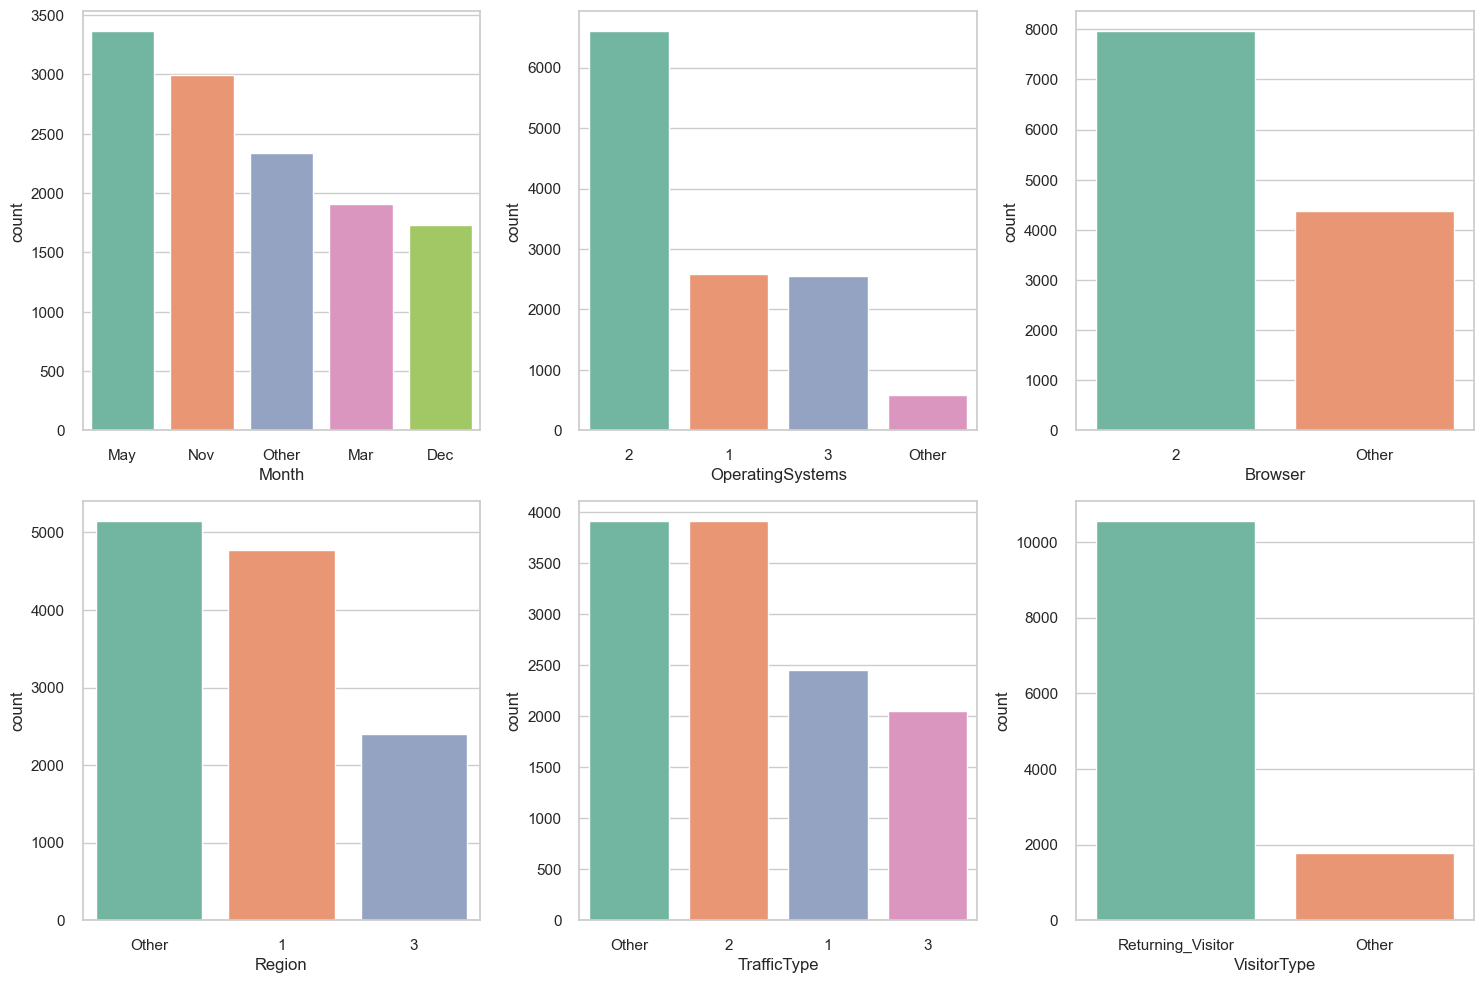

In [237]:
# reduce the dimensionality of the data
data['Month'] = data['Month'].astype(str)
mask = data['Month'].isin(['May', 'Nov', 'Mar', 'Dec'])
data.loc[~mask, 'Month'] = 'Other'

data['OperatingSystems'] = data['OperatingSystems'].astype(str)
mask = data['OperatingSystems'].isin(['2', '1', '3'])
data.loc[~mask, 'OperatingSystems'] = 'Other'

data['Browser'] = data['Browser'].astype(str)
mask = data['Browser'].isin(['2'])
data.loc[~mask, 'Browser'] = 'Other'

data['Region'] = data['Region'].astype(str)
mask = data['Region'].isin(['1', '3'])
data.loc[~mask, 'Region'] = 'Other'

data['TrafficType'] = data['TrafficType'].astype(str)
mask = data['TrafficType'].isin(['2', '1', '3'])
data.loc[~mask, 'TrafficType'] = 'Other'

data['VisitorType'] = data['VisitorType'].astype(str)
mask = data['VisitorType'].isin(['Returning_Visitor'])
data.loc[~mask, 'VisitorType'] = 'Other'

# change the data type to category
col_cat = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for col in col_cat:
    data[col] = data[col].astype('category')
    
# visualize the distribution after reducing the dimensionality
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for col, ax in zip(col_cat, axes.flatten()):
    order = list(data[col].value_counts().sort_values(ascending=False).index)
    sns.countplot(x=col, data=data, ax=ax, order=order)

plt.tight_layout()
plt.show()

In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
seed = 1

In [239]:
# one-hot encoding
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Purchase,Month_Mar,...,OperatingSystems_3,OperatingSystems_Other,Browser_Other,Region_3,Region_Other,TrafficType_2,TrafficType_3,TrafficType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0.0,0.0,0.0,0.0,0.000000,0.182322,0.0,0.0,0,False,...,False,False,True,False,False,False,False,False,True,False
1,0.0,0.0,0.0,0.0,4.174387,0.095310,0.0,0.0,0,False,...,False,False,False,False,False,True,False,False,True,False
2,0.0,0.0,0.0,0.0,0.000000,0.182322,0.0,0.0,0,False,...,False,True,True,False,True,False,True,False,True,False
3,0.0,0.0,0.0,0.0,1.299283,0.131028,0.0,0.0,0,False,...,True,False,False,False,True,False,False,True,True,False
4,0.0,0.0,0.0,0.0,6.443336,0.048790,0.0,0.0,0,False,...,True,False,True,False,False,False,False,True,True,True


In [240]:
# split the data into features and target variable
y = data_dummies['Purchase']
X = data_dummies.drop(columns='Purchase', axis=1)

In [241]:
# standardize the numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# split the data into train and test subsets and stratified sampling the test data size to be 30%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed, stratify=y)

In [242]:
# cross validation
kf = KFold(n_splits=5, random_state=seed, shuffle=True)
lr = LogisticRegression()
cv_accuracy = cross_val_score(lr, X_train, y_train, cv=kf)
print(f'Cross validation accuracy: {cv_accuracy.mean().round(4) * 100}%')

Cross validation accuracy: 89.61%


In [243]:
# fit the model and predict the test data
y_pred = lr.fit(X_train, y_train).predict(X_test)

Classfication Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3127
           1       0.73      0.58      0.64       572

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.89      0.90      0.90      3699




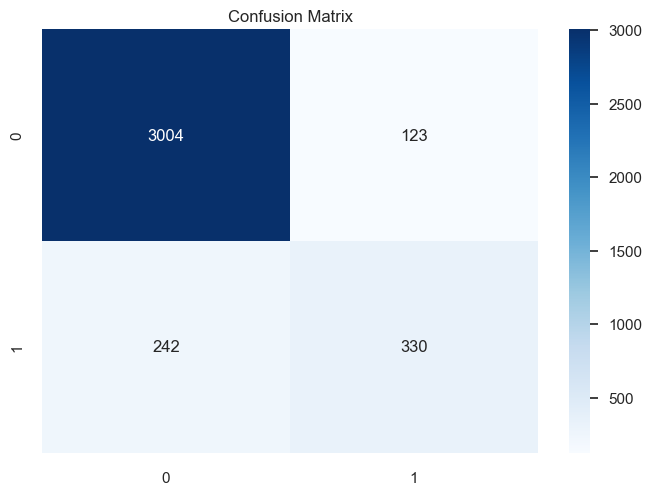

In [244]:
# generate the classification report and confusion matrix
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Classfication Report:\n{report}\n')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

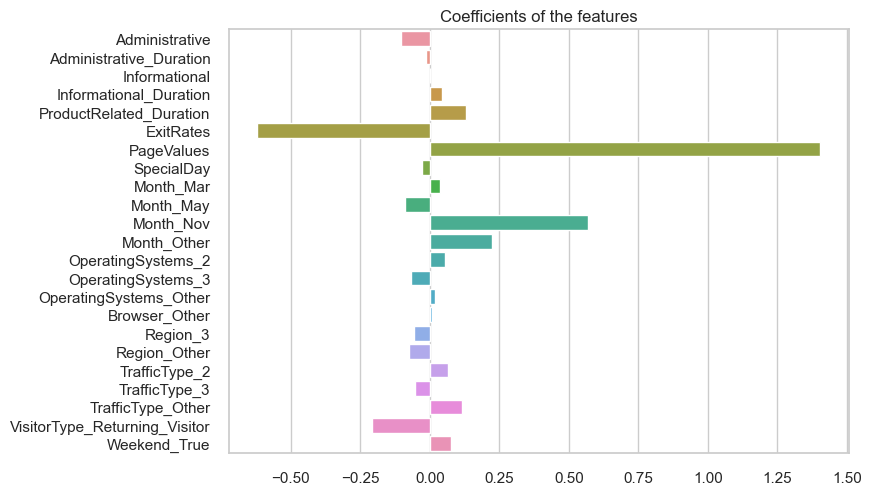

In [245]:
# plot the coefficients of the features
coef = list(lr.coef_[0])
features = list(X_train.columns)
coefficients = pd.DataFrame(dict(zip(features, coef)), index=[0])
sns.barplot(data=coefficients, orient="h")
plt.title("Coefficients of the features")
plt.show()

In [246]:
from sklearn.cluster import KMeans
from yellowbrick import cluster

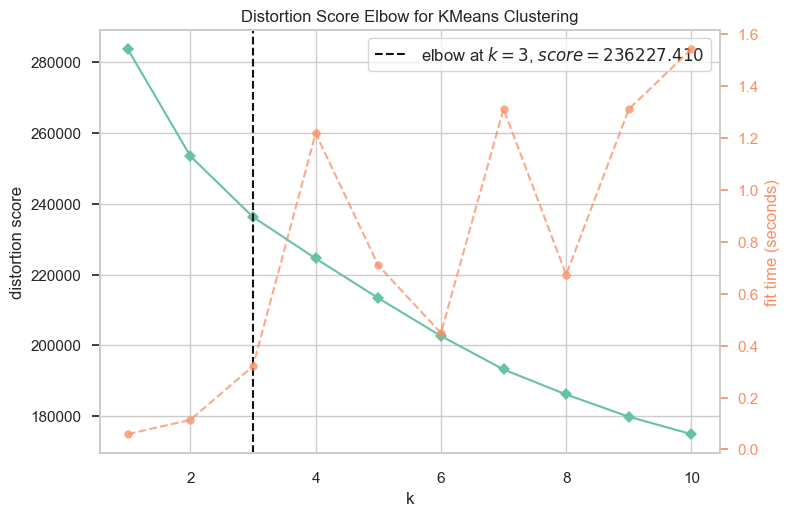

In [247]:
# instantiate the clustering model and visualizer
model = KMeans(random_state=seed)
visualizer = cluster.KElbowVisualizer(model, k=(1, 11))

# fit the data to the visualizer
visualizer.fit(X_scaled) 

# finalize and render the figure
visualizer.show()

plt.show()

In [248]:
# define the number of clusters
km = KMeans(n_clusters=3, random_state=seed)

# fit the whole set of data and predict the cluster labels
pred_labels = km.fit_predict(X_scaled)

In [249]:
from sklearn.decomposition import PCA

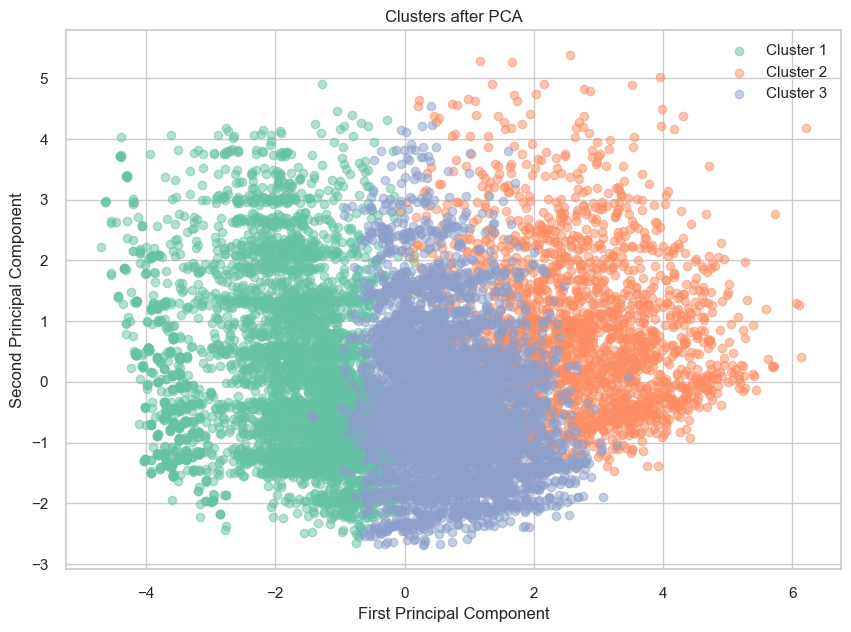

In [250]:
# apply PCA and fit the features selected
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# create a scatter plot
plt.figure(figsize=(10, 7))

for i, label in enumerate(set(pred_labels)):
    plt.scatter(X_pca[pred_labels == label, 0], 
                X_pca[pred_labels == label, 1], 
                label=f'Cluster {i+1}',
                alpha=.5)

plt.legend()
plt.title("Clusters after PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [251]:
def purity_score(y_true, y_pred):
    # compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

In [252]:
# calculate purity score of the clustering result
purity = purity_score(y, pred_labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 84.53%


In [253]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import cluster_encoder

In [254]:
# transform df to array
X_array = X_scaled.values

In [255]:
# define a function to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X_array, 3, random_state=seed).initialize()
    
    # instance created for respective distance metric
    instanceKm = kmeans(X_array, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    
    # perform cluster analysis
    instanceKm.process()
    
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X_array)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    
    return purity_score(y, pyLabels)

In [256]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 84.53%
The purity score for squared euclidean distance is 84.53%
The purity score for manhattan distance is 84.53%
The purity score for chebyshev distance is 84.53%
The purity score for canberra distance is 84.53%
The purity score for chi-square distance is 84.53%
